# Execution Interval Method

In [19]:
import json
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import defaultdict
from libraries.utils import *
from libraries.exeint import exeInt




## Load Data

In [20]:
############ configuration ################
############################################

CODE = 'lora_ducy'       ### application (code)
BEHAVIOUR_FAULTY = 'faulty_data'            ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'            ### normal, faulty_data
THREAD = 'single'           ### single, multi
VER = 3                     ### format of data collection

base_dir = '../trace_data' ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print(normalbase_path)
print(faultybase_path)

../trace_data/lora_ducy/single_thread/version_3/normal
../trace_data/lora_ducy/single_thread/version_3/faulty_data


In [21]:

train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = os.listdir(normalbase_path)
train_varlist_path = [os.path.join(normalbase_path, x) for x in train_varlist_path if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

### remove.Ds_store from all lists
train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

# print(paths_log)
# print(paths_traces)
# print(varlist_path)
# print(paths_label)

test_data_path = paths_traces
test_label_path = paths_label

print(train_data_path)
print(test_data_path)
print(test_label_path)


['../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial6', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial5', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial2', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial3', '../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial4']
['../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial1', '../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial2', '../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial3', '../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial4', '../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial5', '../trace_data/lora_ducy/single_thread/version_3/faulty_data/trace_trial6']
['../trace_data/lora_ducy/single_thread/version_3/

In [22]:
varlist_path

['../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial1.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial2.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial3.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial4.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial5.json',
 '../trace_data/lora_ducy/single_thread/version_3/faulty_data/varlist_trial6.json']

In [23]:
############# check varlist is consistent ############
############# only for version 3 ######################

if VER == 3:
    check_con, _ = is_consistent([train_varlist_path[0]]+ varlist_path) ### compare with train varlist

    if check_con != False:
        to_number = read_json(varlist_path[0])
        from_number = mapint2var(to_number)
    else:
        ### load normal varlist
        print('loading normal varlist')
        to_number = read_json(train_varlist_path[0])
        from_number = mapint2var(to_number)



varlist 1 is consistent with varlist 0
varlist 2 is consistent with varlist 0
varlist 3 is consistent with varlist 0
varlist 4 is consistent with varlist 0
varlist 5 is consistent with varlist 0
varlist 6 is consistent with varlist 0


In [24]:
#### key finder ####
from_number[44]

'0-0-0-lora_off_time'

In [25]:
############ Get variable list ######################
sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]   ### get the variable list
# print(var_list)

## Confidence Interval

__Confidence Interval:__

A confidence interval is a range around the mean that is likely to contain the true population mean. The formula for a confidence interval is mean ± margin of error mean±margin of error, where the margin of error depends on the desired confidence level and the standard error.

_Example:_

1. Choose a confidence level (e.g., 95%).
2. Calculate the standard error: standard deviation/ sqr_root(number of observations)
3. Calculate the margin of error: critical value × standard error
4. Determine the confidence interval: mean ± margin of error


In [26]:
### initialize exeinz
ei = exeInt()

### Data Processing

In [27]:
### get execution intervals for all variables

exe_list, filewise_exe_list = ei.get_exeint(train_data_path)

../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1
../trace_data/lora_ducy/single_thread/version_3/normal/train_data/trace_trial1
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 77, 78, 79, 74, 80, 75, 81, 82, 83, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76])
0 44 2219
0 2219 2232
0 2232 21070
0 21070 22073
0 22073 22868
0 22868 41077
0 41077 42079
0 42079 44186
0 44186 61088
0 61088 62089
0 62089 63511
0 63511 82255
0 82255 83254
0 83254 84202
0 84202 102267
0 102267 103266
0 103266 104216
0 104216 122281
0 122281 141054
0 141054 142542
0 142542 143545
0 143545 144481
0 144481 159578
0 159578 160581
0 160581 161168
0 161168 180751
0 180751 197210
0 197210 199610
0 199610 200613
0 200613 202712
0 202712 217974
0 217974 218978
0 218978 219896
0 219896 237

In [28]:
for k in list(exe_list.keys()):
    print(k, len(exe_list[k]))

0 527
21 30
22 334
23 186
26 12
28 186
30 65
34 79
37 30
38 285
40 30
41 38
42 38
50 12
51 12
52 12
53 12
54 42
56 235
57 342
58 128
59 180
60 121
77 93
78 93
79 93
74 453
80 34
75 453
81 34
82 24
83 93
61 403
62 43
63 43
64 44
65 43
66 43
67 71
68 50
69 108
70 328
71 328
72 328
73 328
76 43
24 28
25 26
27 7
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
29 3
31 3
32 3
33 3
35 3
36 3
39 3
43 3
44 3
45 3
46 3
47 3
48 3
49 3
55 3
84 3
85 3


In [29]:
################## methods to detect outliers based on execution intervals ####################

############ calculate dynamic thresholds ############
thresholds = ei.get_dynamicthresh(exe_list)

############ train lof model ################
lof_models = ei.train_lof(exe_list)

######### save thresholds and lof models ############
### visualize the thresholds for varlist
thresholds_var = {}
for key in thresholds.keys():
    thresholds_var[from_number[key]] = thresholds[key]

assert len(thresholds_var) == len(thresholds)
thresholds_var
save_json(thresholds_var, os.path.join(faultybase_path, 'thresholds.json'))

0
value: 0.0 prob: 0.11195445920303605
value: 1.0 prob: 0.2030360531309298
value: 2.2 prob: 0.0056925996204933585
value: 0.8 prob: 0.0056925996204933585
value: 2.1 prob: 0.06451612903225806
value: 1.4 prob: 0.007590132827324478
value: 1.5 prob: 0.009487666034155597
value: 2.4 prob: 0.003795066413662239
value: 1.1 prob: 0.007590132827324478
value: 7.1 prob: 0.0018975332068311196
value: 6.2 prob: 0.007590132827324478
value: 11.7 prob: 0.0018975332068311196
value: 4.9 prob: 0.0018975332068311196
value: 13.8 prob: 0.0056925996204933585
value: 5.4 prob: 0.007590132827324478
value: 15.1 prob: 0.0018975332068311196
value: 16.9 prob: 0.04174573055028463
value: 16.5 prob: 0.0018975332068311196
value: 18.8 prob: 0.020872865275142316
value: 18.2 prob: 0.0018975332068311196
value: 18.7 prob: 0.003795066413662239
value: 18.1 prob: 0.04743833017077799
value: 19.6 prob: 0.0018975332068311196
value: 15.3 prob: 0.0056925996204933585
value: 17.6 prob: 0.007590132827324478
value: 19.1 prob: 0.00569259962

In [30]:
thresholds_var

{'0-0-0-lora': [0.0, 20.2],
 '0-0-0-packet_number': [9.6, 209.3],
 '0-0-0-transmissions': [0.8, 202.7],
 '0-0-0-alive_time': [1.4, 38.8],
 '0-0-0-failed_attempts': [20.4, 516.2],
 '0-0-0-Awake_instance': [1.4, 38.8],
 '0-0-0-fast_sleep_time_save': [2.5, 298.1],
 '0-0-0-ack': [1.6, 202.2],
 '0-0-0-ack_data_packets': [9.6, 209.3],
 '0-0-0-cca_list': [0.4, 21.3],
 '0-0-0-received_full_data': [18.8, 237.9],
 '0-0-0-phase_lock_optimization': [9.6, 209.3],
 '0-0-0-phase_lock_optimization_time': [9.5, 209.3],
 '0-0-0-neighbor': [0.0, 398.7],
 '0-0-0-packet_status': [0.2, 21.3],
 '0-0-cca-c': [0.3, 20.1],
 '0-0-cca-l': [1.4, 178.6],
 '0-0-0-channel_status': [16.9, 21.3],
 '0-0-packet_check-number': [16.9, 200.2],
 '0-0-0-noise_found': [16.9, 159.1],
 '0-0-0-time_now': [16.9, 159.1],
 '0-0-0-event': [16.9, 159.1],
 '0-0-0-rcv_packet1': [0.4, 66.7],
 '0-0-0-rcv_packet': [18.8, 178.8],
 '0-0-0-decode_packet': [0.5, 66.7],
 '0-0-0-receiving_data': [18.8, 178.8],
 '0-0-0-ack_packet': [18.8, 237.9],

In [31]:
lof_models

{0: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 21: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 22: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 23: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 26: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 28: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 30: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 34: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 37: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 38: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 40: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 41: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 42: LocalOutlierFactor(contamination=0.01, n_neighbors=2, novelty=True),
 50: LocalOutlierFactor(contamination=0

### Visualising Thresholds

In [14]:
### plot exe_list to vsiualize the distribution of execution intervals
# ei.viz_thresholds(exe_list, thresholds=thresholds)


### Validation

In [15]:
#### Detect anomalies in faulty traces
DIFF_VAL = 2
all_tp = []
all_fp = []
all_fn = []
all_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]  
all_group_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
all_merged_detections = [] ### format [file1_detection, file2_detection] -> file1_detection: [(state1, 0), (ts1, ts2), filename]
y_pred_all = []
y_true_all = []
for test_data, test_label in zip(test_data_path, test_label_path):
    print(test_data, test_label)

    detection = ei.test_single(test_data, thresholds=thresholds)   ### detection in format: [var, (ts1,ts2), file_name]     ### threshold based detection
    # detection = ei.test_single(test_data, lof_models=lof_models)   ### detection in format: [var, (ts1,ts2), file_name]    ### lof based detection

    merged_detection, grouped_det = ei.merge_detections(detection, DIFF_VAL)  ### merge detections for multiple variables
    detection = merged_detection
    # dedup_detection, grouped_det = ei.remove_duplicates(detection, DIFF_VAL)  ### remove multiple detections for single ground truth
    # detection = dedup_detection

    all_detections += [(test_data, detection, test_label)]  ### used to plot detections
    all_group_detections += [(test_data, grouped_det, test_label)]  ### used to plot grouped detections
    # all_merged_detections += [(test_data, merged_detection, test_label)]  ### used to plot merged detections

    ### load ground truths
    ground_truth_raw = read_traces(test_label)
    ground_truth = ground_truth_raw['labels']
    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    print('ground truths:', ground_truth)
    print(len(ground_truth))

    # correct_pred, rest_pred, y_pred, y_true = get_ypred_ytrue(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred
    correct_pred, rest_pred, y_pred, y_true, false_neg = ei.get_correct_detections(detection, ground_truth)  ### case1_pred, case2_pred, case34_pred, rest_pred

    assert( len(detection) == len(correct_pred) + len(rest_pred) )

    all_tp += [(test_data, correct_pred, test_label)]
    all_fp += [(test_data, rest_pred, test_label)]
    all_fn += [(test_data, false_neg, test_label)]

    y_pred_all.extend(y_pred)
    y_true_all.extend(y_true)

    # break

../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial1 ../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json
49 not present during training
49 not present during training
49 not present during training
57 not present during training
49 not present during training
57 not present during training
49 not present during training
49 not present during training
57 not present during training
49 not present during training
49 not present during training
57 not present during training
23 not present during training
24 not present during training
49 not present during training
49 not present during training
56 not present during training
57 not present during training
23 not present during training
24 not present during training
49 not present during training
49 not present during training
56 not present during training
50 not present during training
56 not present during training
57 not present during training
49 not present during training
49 n

In [14]:
all_fn

[('../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial1',
  [[1663, 1726, 88554, 91905, 1]],
  '../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial1_labels.json'),
 ('../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial2',
  [],
  '../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial2_labels.json'),
 ('../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial3',
  [],
  '../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial3_labels.json'),
 ('../trace_data/mamba2/single_thread/version_3/faulty_data/trace_trial4',
  [[7633, 7694, 407648, 410240, 1]],
  '../trace_data/mamba2/single_thread/version_3/faulty_data/labels/trace_trial4_labels.json')]

Precision: 0.6377
Recall: 0.9565
F1 Score: 0.7652
Confusion Matrix:
[[ 0 25]
 [ 2 44]]


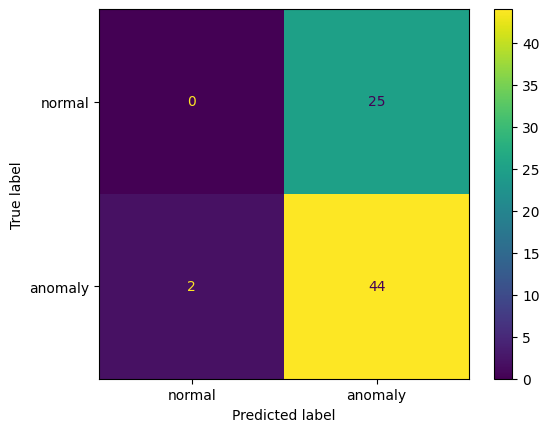

In [14]:
### Evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, average_precision_score, ConfusionMatrixDisplay


# Calculate precision
precision = precision_score(y_true_all, y_pred_all)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_all, y_pred_all)
print(f'Recall: {recall:.4f}')

# # Calculate average precision
# average_precision = average_precision_score(y_true_all, y_pred_all)
# print(f'Average Precision: {average_precision:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_all, y_pred_all)
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
print("Confusion Matrix:")
print(conf_matrix)
if len(conf_matrix) == 1:
    conf_matrix = np.array([[0, 0], [0, conf_matrix[0][0]]])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['normal', 'anomaly'])
disp.plot()

## Save Detections

In [ ]:
######## save detections for the dashboard to plot #############
import traceback

for test_data, detections, test_label in all_detections:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'ei_detections')
    tp_detection_path = detection_path.replace('ei_detections.json', 'tp_ei_detections.json')
    fp_detection_path = detection_path.replace('ei_detections.json', 'fp_ei_detections.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:
        with open(detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {detection_path}')

            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_tp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'ei_detections')
    tp_detection_path = detection_path.replace('ei_detections.json', 'tp_ei_detections.json')
    fp_detection_path = detection_path.replace('ei_detections.json', 'fp_ei_detections.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(tp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {tp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

for test_data, detections, test_label in all_fp:
    # print(test_data, test_label)
    # print(test_label.replace('labels', 'detections'))
    detection_path = test_label.replace('labels', 'ei_detections')
    tp_detection_path = detection_path.replace('ei_detections.json', 'tp_ei_detections.json')
    fp_detection_path = detection_path.replace('ei_detections.json', 'fp_ei_detections.json')
    # print(detections)

    detection_dir = os.path.dirname(detection_path)
    # print(detection_dir)
    if not os.path.exists(detection_dir):
        os.makedirs(detection_dir)
        print(f'Created Directory: {detection_dir}')

    try:

        with open(fp_detection_path, 'w') as f:
            json.dump(detections, f)
            print(f'Saved detections in {fp_detection_path}')
            
    except Exception as e:
        traceback.print_exception(e)
        print('Error in saving detections')
        continue

In [ ]:
print('Total Detections:', len(all_detections[1][1]))
print('Total Groups:', len(all_group_detections[1][1]))
i=0
for item in all_group_detections[1][1]:
    for ind_item in item:
        i+=1
print('Detections in Groups:', i)
print('Total Merged:', len(all_merged_detections[1][1]))

In [ ]:
all_detections[0]

## Plot Detections

In [ ]:
# ### plot gt and detections
# for test_data, detections, test_label in all_detections:
# # for test_data, detections, test_label in all_fp:
#     # print('test_data:', test_data)
#     # print('detections:', detections)
#     # print(test_label)

#     ### prepare trace to plot
#     col_data = preprocess_traces([test_data])
#     all_df = get_dataframe(col_data) 
#     # print(all_df[0])

#     ### prepare detections to plot
#     timestamps = col_data[0][1]
#     print('timestamps:', timestamps)
#     plot_val = []
#     plot_x_ticks = []
#     plot_class = []
#     for det in detections:
#         # print(det)
#         det_ts1, det_ts2 = det[1]
#         # print(det_ts1, det_ts2)

#         det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
#         det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

#         det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
#         det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
#         # print(det_ind1, det_ind2)
#         # print(timestamps[det_ind1], timestamps[det_ind2])

#         plot_val += [(det_ind1, det_ind2)]
#         plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
#         plot_class += [0]

#     plot_detections = [plot_val, plot_x_ticks, plot_class]

#     ### get ground truths
#     gt_plot = prepare_gt(test_label)

#     ### plot
#     for df in all_df:
#         # print(df.columns)
#         plot_fig = plot_single_trace(df, 
#                           var_list, 
#                           with_time=False, 
#                           is_xticks=True, 
#                           detections=plot_detections, 
#                           dt_classlist=['detection'],
#                           ground_truths=gt_plot,
#                           gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
#                           )
#         plot_fig.show()

#     # break

In [ ]:
# ##### plot merged detections
# ### plot gt and detections
# # for test_data, detections, test_label in all_detections:
# # for test_data, detections, test_label in all_merged_detections: #### all merged detections
# for test_data, detections, test_label in all_fp:
#     # print('test_data:', test_data)
#     # print('detections:', detections)
#     # print(test_label)

#     ### prepare trace to plot
#     col_data = preprocess_traces([test_data])
#     all_df = get_dataframe(col_data) 
#     # print(all_df[0])

#     ### prepare detections to plot
#     timestamps = col_data[0][1]
#     print('timestamps:', timestamps)
#     plot_val = []
#     plot_x_ticks = []
#     plot_class = []
#     for det in detections:
#         # print(det)
#         det_ts1, det_ts2 = det[1]
#         # print(det_ts1, det_ts2)

#         det_ind1_pre = [ abs(t-det_ts1) for t in timestamps]
#         det_ind1 = det_ind1_pre.index(min(det_ind1_pre))

#         det_ind2_pre = [ abs(t-det_ts2) for t in timestamps]
#         det_ind2 = det_ind2_pre.index(min(det_ind2_pre))
#         # print(det_ind1, det_ind2)
#         # print(timestamps[det_ind1], timestamps[det_ind2])

#         plot_val += [(det_ind1, det_ind2)]
#         plot_x_ticks += [(timestamps[det_ind1], timestamps[det_ind2])]
#         plot_class += [0]

#     plot_detections = [plot_val, plot_x_ticks, plot_class]

#     ### get ground truths
#     gt_plot = prepare_gt(test_label)

#     ### plot
#     for df in all_df:
#         # print(df.columns)
#         plot_fig = plot_single_trace(df, 
#                           var_list, 
#                           with_time=False, 
#                           is_xticks=True, 
#                           detections=plot_detections, 
#                           dt_classlist=['detection'],
#                           ground_truths=gt_plot,
#                           gt_classlist=['gt_communication', 'gt_sensor', 'gt_bitflip'],
#                           )
#         plot_fig.show()

#     # break

In [ ]:
1890

Observations
---
- since multiple variables are affected due to single anomaly, multiple detections are generated for each anomaly.
- This leads to multiple FP.
- To avoid this, we implement deduplication which groups the detections that are close to each other bsed on timestamp
- However, in this process along with decrease in FP, we have more False Negatives i.e. some anomalies are not detected. 

TODO:
- change deduplication stratergy, if possible